In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modulo que contiene los datasets
from sklearn.datasets import fetch_openml
# Modulo de PCA
from sklearn.decomposition import PCA

In [ ]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Asignar 02 objetos a 02 variables
X, y = mnist["data"], mnist["target"]

In [ ]:
# Convertir a DataFrame de Pandas
mnist_df = pd.DataFrame(X)
mnist_df['label'] = y

<ipython-input-4-1f652abeb5ae>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mnist_df['label'] = y


In [ ]:
# Revisar la cabecera del DataFrame
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [ ]:
mnist_df.dtypes

pixel1       float64
pixel2       float64
pixel3       float64
pixel4       float64
pixel5       float64
              ...   
pixel781     float64
pixel782     float64
pixel783     float64
pixel784     float64
label       category
Length: 785, dtype: object

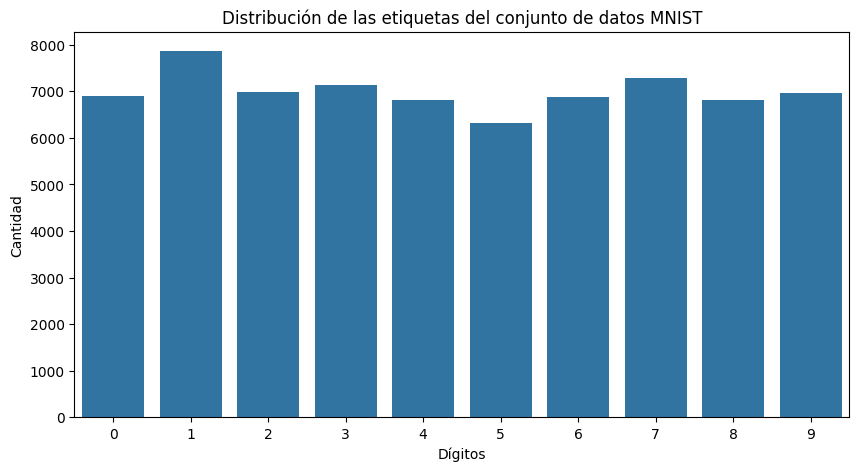

In [ ]:
# Distribución de las etiquetas
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=mnist_df)
plt.title('Distribución de las etiquetas del conjunto de datos MNIST')
plt.xlabel('Dígitos')
plt.ylabel('Cantidad')
plt.show()

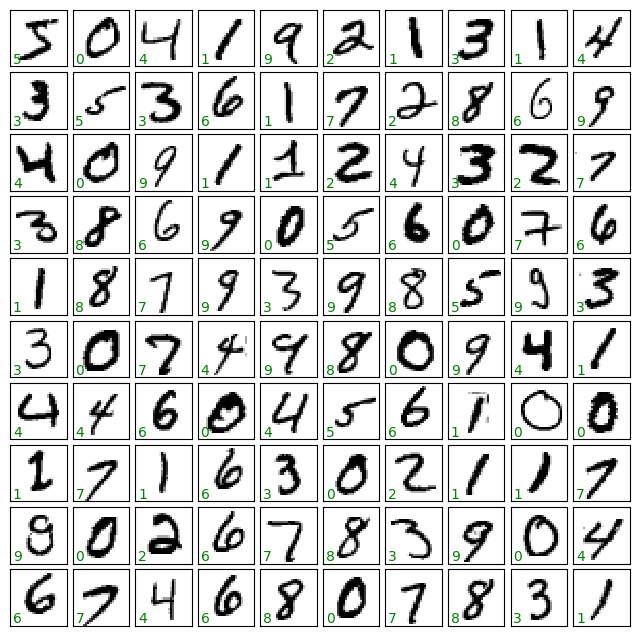

In [ ]:
# Visualización de Muestras Individuales
X_np = np.array(X)[:, :784]

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_np[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, color='green')

plt.show()

In [ ]:
X.shape

(70000, 784)

In [ ]:
X_pca.shape

(70000, 2)

In [ ]:
# Convertir etiquetas a enteros
mnist_df['label'] = mnist_df['label'].astype(np.uint8) # entero u: unsigned (sin signo) 8: 8bytes

In [ ]:
mnist_df.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
label         uint8
Length: 785, dtype: object

Text(0.5, 1.0, 'PCA visualization of MNIST')

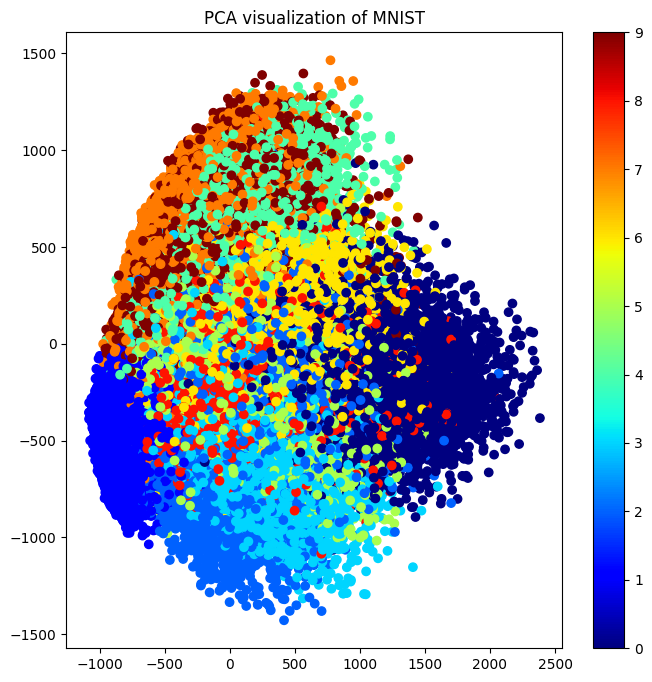

In [ ]:
# Visualización de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mnist_df['label'], cmap="jet")
plt.colorbar()
plt.title('PCA visualization of MNIST')